In [1]:
import numpy as np
import ktrain
from ktrain import text
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
import seaborn as sns
import pickle

c:\Users\Public\anaconda3\envs\ktrain_envvv22\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("SQLIV3_cleaned2.csv")
print(df)

                                                Sentence  Label
0                      " or pg_sleep  (  __TIME__  )  --      1
1      create user name identified by pass123 tempora...      1
2       AND 1  =  utl_inaddr.get_host_address   (    ...      1
3       select * from users where id  =  '1' or @ @1 ...      1
4       select * from users where id  =  1 or 1#"  ( ...      1
...                                                  ...    ...
30609              DELETE FROM door WHERE grow = 'small'      0
30610                               DELETE FROM tomorrow      0
30611                       SELECT wide ( s )  FROM west      0
30612       SELECT * FROM  ( SELECT slide FROM breath )       0
30613                           SELECT TOP 3 * FROM race      0

[30614 rows x 2 columns]


In [3]:
df.shape

(30614, 2)

In [4]:
print("----------------------------------------------------")
df.info()
print("----------------------------------------------------")

----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30614 entries, 0 to 30613
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  30614 non-null  object
 1   Label     30614 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 478.5+ KB
----------------------------------------------------


In [5]:
df['Label'].describe()


count    30614.000000
mean         0.370615
std          0.482977
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Label, dtype: float64

In [6]:
df['Label'].isna().sum() # Count NaN label values.


0

In [7]:
df['Label'].describe()


count    30614.000000
mean         0.370615
std          0.482977
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Label, dtype: float64

In [8]:
# Get unique values existing in the label column.

unique_label = pd.unique(df['Label'])

print(unique_label)

[1 0]


In [9]:
df[df['Label'] == 1].count() # Count how much label are 1.


Sentence    11346
Label       11346
dtype: int64

In [10]:
df[df['Label'] == 0].count() # Count how much label are 0.


Sentence    19268
Label       19268
dtype: int64

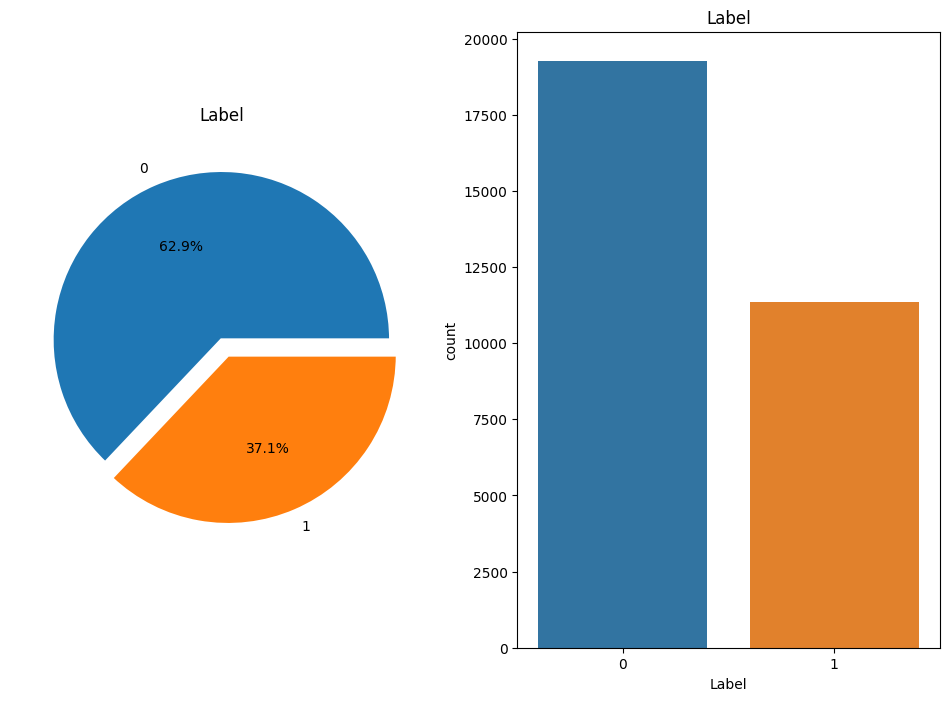

In [11]:
import matplotlib.colors as mcolors
f, ax = plt.subplots(1, 2, figsize=(12, 8))
colors = list(mcolors.TABLEAU_COLORS.values())
df['Label'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], wedgeprops={'edgecolor': 'white', 'linewidth': 2, 'antialiased': True}, colors=colors)

ax[0].set_title('Label')
ax[0].set_ylabel('')
sns.countplot(x='Label', data=df, ax=ax[1], palette=colors)
ax[1].set_title('Label')
plt.show()

In [12]:
sentences = df['Sentence'].tolist()
labels = df['Label'].tolist()
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_array(sentences, labels,
                                                                       preprocess_mode='bert',
                                                                       maxlen=100,
                                                                      val_pct=0.2,
                                                                      class_names=list(set(labels))
                                                                      )

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


task: text classification
